In [44]:
import pandas as pd

import os

In [45]:


train = pd.read_csv('/Users/margokim/Documents/Learning Spoons Data 2/파이썬 포트폴리오/프로젝트 3. Home Credit 대출상환여부 예측/data/train.csv')
test = pd.read_csv('/Users/margokim/Documents/Learning Spoons Data 2/파이썬 포트폴리오/프로젝트 3. Home Credit 대출상환여부 예측/data/test.csv')
lb = pd.read_csv('/Users/margokim/Documents/Learning Spoons Data 2/파이썬 포트폴리오/프로젝트 3. Home Credit 대출상환여부 예측/data/loan_before.csv')

In [46]:
lb.columns

Index(['SK_ID_CURR', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'CREDIT_TYPE'],
      dtype='object')

# 1. Project Research Question

<strong> Question 1. What factors have a significant impact on the repayment of the loan? <br>
<strong> Question 2. And how do those factors affect loan repayment?

In [47]:
# Explainable Machine Learning
# shap Value


# 2. Methodology
## 2.1 Analysis Process
Interpretable machine learning (xAI) was used to obtain the answer to this question. <br>

### Process
#### Step 1: Do feature engineering.
#### Step 2: Create a machine learning model.
#### Step 3: Find out which variable has the greatest influence through the shape value.
#### Step 4: Look at the relationship between the five variables that have a lot of influence and whether or not the loan is repaid.

## 2.2 Feature Engineering

In [48]:
train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,162716,0,0.0,0,1,0,101250.0,480060.0,22509.0,Unaccompanied,...,-2256,NaN,2.0,15,Kindergarten,NaN,0.665732,NaN,-139.0,1.0
1,361317,0,0.0,0,1,2,225000.0,237024.0,12231.0,Unaccompanied,...,-4133,NaN,4.0,3,Business Entity Type 3,0.575699,0.535140,0.670652,-957.0,0.0
2,246925,0,1.0,0,0,0,171000.0,247675.5,26005.5,Unaccompanied,...,-4340,NaN,2.0,10,Business Entity Type 3,0.092273,0.002272,0.154744,-827.0,1.0
3,294331,0,1.0,1,0,0,225000.0,180000.0,9000.0,Unaccompanied,...,-1621,12.0,2.0,12,Trade: type 7,0.221815,0.120444,NaN,-569.0,2.0
4,152173,0,0.0,0,1,0,180000.0,337500.0,12852.0,Unaccompanied,...,-2870,NaN,1.0,12,XNA,NaN,0.722415,0.723837,-1544.0,4.0


In [49]:
# Making a new variable --> how many months you pay off the loan
train['AMT_CREDIT_TO_ANNUITY_RATIO'] = train['AMT_CREDIT']/train['AMT_ANNUITY']
test['AMT_CREDIT_TO_ANNUITY_RATIO'] = test['AMT_CREDIT']/test['AMT_ANNUITY']
# AMT_CREDIT divided AMT_ANNUITY to variable over how many months the person should pay back the money.
# Use loan_before as auxiliary data --> If one person has taken out a loan several times before, each data occurs, each loan information

In [50]:
lb

,SK_ID_CURR,DAYS_CREDIT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,CREDIT_TYPE
0,400486,-2413,0,180000.0,Consumer credit
1,400486,-941,0,40500.0,Credit card
2,400486,-1110,0,114727.5,Consumer credit
3,400486,-2133,0,225000.0,Consumer credit
4,400486,-391,0,142290.0,Consumer credit
...,...,...,...,...,...
142755,375755,-1335,0,195408.0,Consumer credit
142756,375755,-2648,0,202500.0,Credit card
142757,259355,-44,0,11250.0,other
142758,246829,-1878,0,36000.0,Consumer credit


It attempts to generate variables using lb (data recorded with previously borrowed information). 
#### 1. Average after group by (mean each variable after grouping by person id)
- AMT_CREDIT_SUM (amount of previous loan)
- DAYS_CREDIT (how many days ago did you proceed with the previous loan from train,test)
- CNT_CREDIT_PROLONG (How many times did you extend the loan)

In [51]:


train = pd.merge( train, lb.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM'].mean().reset_index(), on='SK_ID_CURR',how='left')
test = pd.merge( test, lb.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM'].mean().reset_index(), on='SK_ID_CURR',how='left')
# Link to how much previous loan amount there was on average per individual through lb(loan before dataset)

In [52]:
train = pd.merge( train, lb.groupby(['SK_ID_CURR'])['DAYS_CREDIT'].mean().reset_index(), on='SK_ID_CURR',how='left')
test = pd.merge( test, lb.groupby(['SK_ID_CURR'])['DAYS_CREDIT'].mean().reset_index(), on='SK_ID_CURR',how='left')

train = pd.merge( train, lb.groupby(['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index(), on='SK_ID_CURR',how='left')
test = pd.merge( test, lb.groupby(['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean().reset_index(), on='SK_ID_CURR',how='left')



#### 2. Number of loans after groupby (frequency by person id, how many times the person previously made loans)

In [53]:


train = pd.merge(train , lb.groupby(['SK_ID_CURR']).size().reset_index().rename(columns={0:'count'}),on='SK_ID_CURR', how='left')
test = pd.merge(test , lb.groupby(['SK_ID_CURR']).size().reset_index().rename(columns={0:'count'}),on='SK_ID_CURR', how='left')
#대출 횟수

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   20000 non-null  int64  
 1   TARGET                       20000 non-null  int64  
 2   CODE_GENDER                  20000 non-null  float64
 3   FLAG_OWN_CAR                 20000 non-null  int64  
 4   FLAG_OWN_REALTY              20000 non-null  int64  
 5   CNT_CHILDREN                 20000 non-null  int64  
 6   AMT_INCOME_TOTAL             20000 non-null  float64
 7   AMT_CREDIT                   20000 non-null  float64
 8   AMT_ANNUITY                  20000 non-null  float64
 9   NAME_TYPE_SUITE              20000 non-null  object 
 10  NAME_INCOME_TYPE             20000 non-null  object 
 11  NAME_EDUCATION_TYPE          20000 non-null  object 
 12  NAME_HOUSING_TYPE            20000 non-null  object 
 13  REGION_POPULATIO

<Strong> Since the purpose of the project is model analysis, all variables that interfere with it are deleted.</Strong>
<br>- List of variables removed<br>
<ul>
<li> CODE_GENDER: Categorical Value <br>
<li>FLAG_OWN_CAR: Categorical variables<br>
<li>NAME_TYPE_SUITE: Categorical variables<br>
<li>NAME_INCOME_TYPE: Categorical variables<br>
<li>NAME_EDUCATION_TYPE: Categorical variables<br>
<li>NAME_HOUSING_TYPE: Categorical variables<br>
<li>ORGANIZATION_TYPE: Categorical variables<br>
<li>EXT_SOURCE_1 : Don't know the meaning of the variable exactly<br>
<li>EXT_SOURCE_2: Don't know exactly what the variable means<br>
<li>EXT_SOURCE_3 : Don't know the meaning of the variable exactly<br>

In [55]:
del_list= ['CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE',  'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [56]:
train = train.drop(del_list, axis =1)
test = test.drop(del_list, axis =1)

train

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,AMT_CREDIT_SUM,DAYS_CREDIT,CNT_CREDIT_PROLONG,count
0,162716,0,1,0,101250.0,480060.0,22509.0,0.009334,-18972,-2174.0,...,NaN,2.0,15,-139.0,1.0,21.327469,3.150000e+05,-36.000000,0.0,1.0
1,361317,0,1,2,225000.0,237024.0,12231.0,0.010032,-11902,-1027.0,...,NaN,4.0,3,-957.0,0.0,19.378955,2.067966e+06,-1408.000000,0.0,9.0
2,246925,0,0,0,171000.0,247675.5,26005.5,0.005144,-13120,-1148.0,...,NaN,2.0,10,-827.0,1.0,9.523966,6.219386e+04,-597.142857,0.0,7.0
3,294331,0,0,0,225000.0,180000.0,9000.0,0.018801,-10240,-1973.0,...,12.0,2.0,12,-569.0,2.0,20.000000,2.770443e+04,-1545.000000,0.0,1.0
4,152173,0,1,0,180000.0,337500.0,12852.0,0.030755,-21220,NaN,...,NaN,1.0,12,-1544.0,4.0,26.260504,1.068750e+05,-2696.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,151299,0,1,0,202500.0,323460.0,25159.5,0.006671,-8568,-1961.0,...,16.0,2.0,13,-596.0,0.0,12.856376,5.992780e+05,-343.800000,0.0,5.0
19996,126098,0,1,0,157500.0,225000.0,13045.5,0.030755,-24489,NaN,...,NaN,1.0,11,-521.0,1.0,17.247327,1.253187e+05,-1077.000000,0.0,5.0
19997,344354,0,1,0,112500.0,835380.0,35523.0,0.020713,-9924,-379.0,...,NaN,1.0,5,-1.0,NaN,23.516595,NaN,NaN,NaN,NaN
19998,443567,0,0,0,76500.0,247500.0,12375.0,0.030755,-11885,-749.0,...,64.0,2.0,14,-386.0,1.0,20.000000,2.341887e+04,-1970.333333,0.0,3.0


In [57]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count'],
      dtype='object')

## 2.3 Modeling 

<strong>Before modeling, delete input variables with high correlation with each other.</strong>

Reason: When the input variable is highly correlated, the shape value does not exhibit proper explanatory power.

In [58]:
input_var = ['FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count']

In [60]:
#변수들관의 상관관계

corr = train[input_var].corr()
corr.style.background_gradient(cmap='coolwarm')

,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,AMT_CREDIT_SUM,DAYS_CREDIT,CNT_CREDIT_PROLONG,count
FLAG_OWN_REALTY,1.000000,0.008244,0.003243,-0.042446,-0.001448,0.010826,-0.110930,-0.015164,0.004217,0.019393,0.014595,-0.105580,0.026066,0.090058,-0.083920,-0.002745,0.000174,-0.009790,0.008414
CNT_CHILDREN,0.008244,1.000000,0.029879,0.006465,0.023275,-0.033326,0.332123,0.068807,-0.029581,-0.010951,0.883051,-0.009661,-0.006102,-0.036431,-0.022026,0.035864,0.026285,-0.012065,0.002649
AMT_INCOME_TOTAL,0.003243,0.029879,1.000000,0.366717,0.441573,0.185047,0.066875,-0.041696,0.029519,-0.126551,0.029342,0.092505,-0.040823,0.031593,0.077303,0.241929,-0.013266,0.016117,0.116635
AMT_CREDIT,-0.042446,0.006465,0.366717,1.000000,0.770938,0.092177,-0.047089,-0.085049,0.000988,-0.111244,0.066847,0.047472,-0.070924,-0.037907,0.656337,0.135435,-0.068411,-0.000384,0.046902
AMT_ANNUITY,-0.001448,0.023275,0.441573,0.770938,1.000000,0.127204,0.017106,-0.048381,0.013662,-0.108185,0.073912,0.047113,-0.058709,0.000270,0.111694,0.128144,-0.052613,-0.005724,0.013588
REGION_POPULATION_RELATIVE,0.010826,-0.033326,0.185047,0.092177,0.127204,1.000000,-0.023276,0.013870,0.000946,-0.088270,-0.025638,0.182730,-0.051167,0.015725,0.003524,0.077984,-0.010819,0.003701,-0.034289
DAYS_BIRTH,-0.110930,0.332123,0.066875,-0.047089,0.017106,-0.023276,1.000000,0.349373,0.266852,-0.015877,0.283729,0.087200,0.080317,-0.073904,-0.097736,0.053205,0.201829,0.028239,-0.063004
DAYS_EMPLOYED,-0.015164,0.068807,-0.041696,-0.085049,-0.048381,0.013870,0.349373,1.000000,0.093421,0.014016,0.032736,0.003502,0.144221,0.003833,-0.087176,-0.018131,0.160521,0.000124,-0.148704
DAYS_ID_PUBLISH,0.004217,-0.029581,0.029519,0.000988,0.013662,0.000946,0.266852,0.093421,1.000000,0.001141,-0.025311,0.029700,0.089952,-0.039895,-0.020280,0.033384,0.188471,0.022736,-0.100673
OWN_CAR_AGE,0.019393,-0.010951,-0.126551,-0.111244,-0.108185,-0.088270,-0.015877,0.014016,0.001141,1.000000,-0.039362,-0.082672,0.013561,-0.025423,-0.059224,-0.094781,-0.006665,0.011323,-0.025711


The variables with high correlation are as follows.<br>
- CNT_FAM_MEMBERS , CNT_CHILDREN<br>
- AMT_CREDIT_TO_ANNUITY_RATIO , AMT_CREDIT<br>
- AMT_ANNUITY , AMT_CREDIT<br>

In [61]:
train['CNT_FAM_MEMBERS'].corr(train['TARGET'])

0.018876651698723754

In [62]:
train['CNT_CHILDREN'].corr(train['TARGET'])

0.025357359317615843

In [63]:
# Since the variable with the target value and the high determination coefficient among CNT_FAM_MEMBERS and CNT_CHILDREN is CNT_CHILDREN, CNT_FAM_MEMBERS is deleted.
del train['CNT_FAM_MEMBERS']
del test['CNT_FAM_MEMBERS']

In [65]:
print(train['AMT_CREDIT_TO_ANNUITY_RATIO'].corr(train['TARGET']))
print(train['AMT_CREDIT'].corr(train['TARGET']))

-0.024740288335190163
-0.022558430849347617


In [66]:
#AMT_CREDIT_TO_ANNUITY_RATIO and AMT_CREDIT, the variable with the target value and the high determination coefficient is AMT_CREDIT_TO_ANNUITY_RATIO, so AMT_CREDIT is deleted.
del train['AMT_CREDIT']
del test['AMT_CREDIT']

In [67]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count'],
      dtype='object')

In [71]:
input_var = ['FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_TO_ANNUITY_RATIO',
       'AMT_CREDIT_SUM', 'DAYS_CREDIT', 'CNT_CREDIT_PROLONG', 'count']

<strong>xgboost to carry out modeling.</strong>

Reason: In order to utilize the shape value, the model must be a tree-type model in the form of a random forest. Choose xgboost because it's fast and maintains high performance

In [72]:
from xgboost import XGBClassifier



In [73]:
model = XGBClassifier(n_estimators = 100, learning_rate = 0.1)

model.fit(train[input_var], train['TARGET'])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## 2.4 Shap Value Utilization

In [74]:
!pip install shap
import shap

     |████████████████████████████████| 436 kB 11.9 MB/s eta 0:00:01


In [75]:
shap_values = shap.TreeExplainer(model).shap_values(train[input_var])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


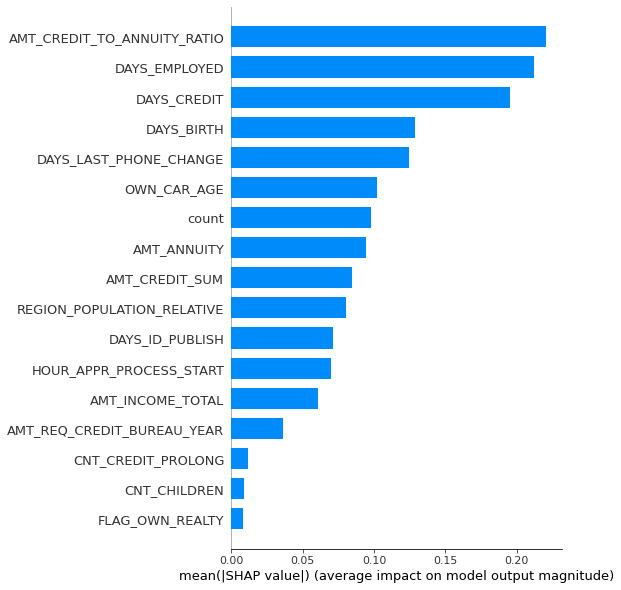

In [77]:
shap.summary_plot(shap_values, train[input_var], plot_type ='bar')

As a result of visualization, the top five variables that have the greatest influence on the target value are as follows.

<ul>
<li>AMT_CREDIT_TO_ANNUITY_RATIO</li>
<li>DAYS_EMPLOYED</li>
<li>DAYS_CREDIT</li>
<li>DAYS_BIRTH</li>
<li>DAYS_LAST_PHONE_CHANGE</li>
</ul>

## 2.5 Determine the relationship between the five variables that have a significant impact and whether they are repaid

#### 1. AMT_CREDIT_TO_ANNUITY_RATIO

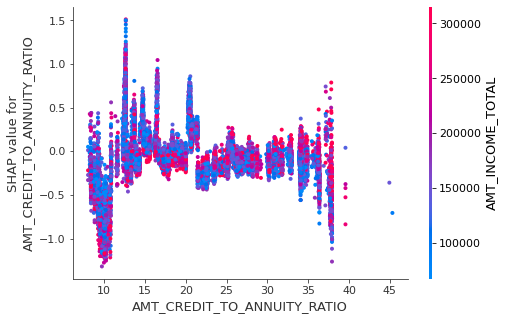

In [78]:
shap.dependence_plot('AMT_CREDIT_TO_ANNUITY_RATIO',shap_values, train[input_var])

When the loan repayment period is between 12 and 20 months, it is relatively poor.<br>
On the other hand, if it is less than 12 months or more, repayment is relatively good.

#### 2. DAYS_EMPLOYED

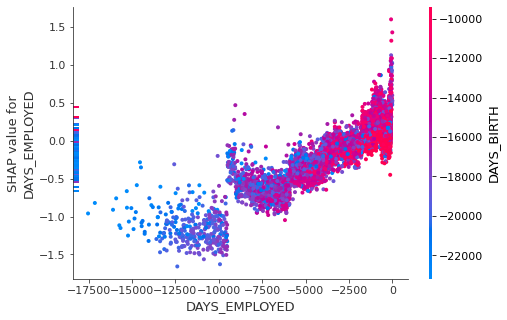

In [79]:
shap.dependence_plot('DAYS_EMPLOYED',shap_values, train[input_var])

The longer you get a job, the higher the probability of loan repayment.<br>
When employed longer than 9,000 days before the loan date, the loan repayment ability rises sharply.

#### 3. DAYS_CREDIT

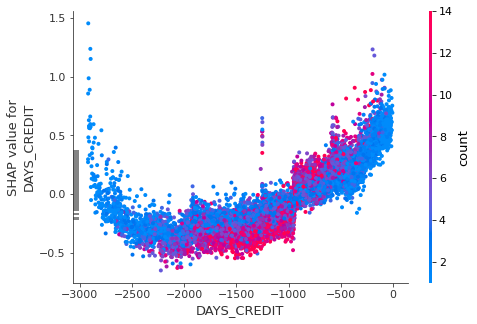

In [81]:
shap.dependence_plot('DAYS_CREDIT',shap_values, train[input_var])

DAYS_CREDIT's loan repayment ability increases from -3000 days to -2000 days.<br>
It has since fallen.<br>

#### 4. DAYS_BIRTH

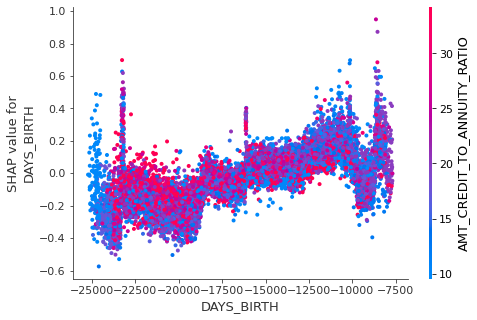

In [82]:
shap.dependence_plot('DAYS_BIRTH',shap_values, train[input_var])

The older you are, the better you tend to repay the loan.

#### 5. DAYS_LAST_PHONE_CHANGE

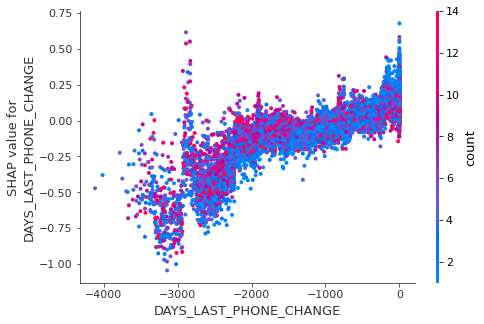

In [83]:
shap.dependence_plot('DAYS_LAST_PHONE_CHANGE',shap_values, train[input_var])

The longer you change your phone, the more likely you are to repay the loan.

## Conclusion

1. The repayment period of the loan has the greatest impact on repayment. The effect is a nonlinear relationship (it is difficult to conclude that there is a causal relationship just because the impact is large)
2. Whether or not to have a house and the number of children do not have a significant impact on the ability to repay loans.
3. The more recently I got a job, the more recently I got a loan, the more recently I changed my phone, and the younger I am, the less likely I am to repay the loan.<br>(The larger the DAYS_EMPLOYED, DAYS_CREDIT, DAYS_LAST_PHONE_CHANGE, and DAYS_BIRTH, the less likely the loan is to be repaid.)

## 3.1 마무리 시각화

In [84]:
 #상위 25%
group1 = train.loc[(train['DAYS_EMPLOYED'].quantile(0.75)< train['DAYS_EMPLOYED'])&
         (train['DAYS_CREDIT'].quantile(0.75)< train['DAYS_CREDIT'])&
         (train['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)< train['DAYS_LAST_PHONE_CHANGE'])&
         (train['DAYS_BIRTH'].quantile(0.75)< train['DAYS_BIRTH'])]

#하위 25% 보다 큰 경우
group2 = train.loc[(train['DAYS_EMPLOYED'].quantile(0.25)> train['DAYS_EMPLOYED'])&
         (train['DAYS_CREDIT'].quantile(0.25)>  train['DAYS_CREDIT'])&
         (train['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)> train['DAYS_LAST_PHONE_CHANGE'])&
         (train['DAYS_BIRTH'].quantile(0.25)>  train['DAYS_BIRTH'])]

In [85]:
group1['group'] = 1 
group2['group'] = 0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [86]:
full = pd.concat([group1, group2], axis=0)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='group', ylabel='TARGET'>

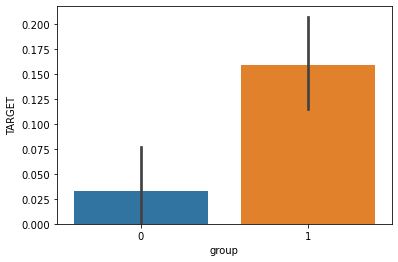

In [88]:
import seaborn as sns
sns.barplot('group','TARGET', data = full)